# Quick Start  

Running a multi-objective optimization requires four key components: 
- A Problem class (**HEA_problem**) defines the relationship between input variables (alloy composition) and the real objectives (NRR catalytic performance).
- A surrogate model (**GPR**) that is built to approximate the underlying performance landscape.
- A Pareto optimization algorithm (**ParetoDiscovery**) that is employed to navigate the trade-offs.
- The **MOBO** function integrates these modules to execute the full optimization.


In [1]:
from heaict.cats.problem import HEA_problem
from heaict.ml.GPR_scikit import GPR
from heaict.mobo.partor_discover import ParetoDiscovery
from heaict.mobo.mobo import MOBO

Define the problem by specifying the elements and surface parameters.   
In this demo, we use NiPdCuMnCo and build a 50×50×3 slab.  

**Note:**  
This small slab speeds up calculation but causes large activity variance for similar compositions.   
Results are for workflow demonstration only and are not reliable.  
Steps for ML adsorption energy prediction and usage of extended surface are pre-defined in the problem class, which must be customized for other studies.  

In [6]:
p = HEA_problem(size=50, archetype=f'Data/Archetype_slab/n3/', model=f'Data/Model_dict/Model_25107_dict.pt', eles=['Ni', 'Pd', 'Cu', 'Mn', 'Co'])

Pass the defined problem to the surrogate model.

In [8]:
sm = GPR(real_problem=p)

Set the hyperparameters for the multi-objective optimization algorithm.

In [10]:
al = ParetoDiscovery(perturb_method='gaussian', delta_p=0.1, sparse_approx=False)

Pass the algorithm and the surrogate model into the MOBO function and execute the multi-objective optimization.

In [12]:
mobo = MOBO(surrogate_model=sm, algorithm=al)

In [15]:
X, Y = mobo.optimize(n_init=30, n_iter=3, return_real=True)

------ Start optimization - [2025-12-18 11:42:48]
Generate 30 initial samples
------ Iteration 1 - [2025-12-18 11:42:48]
Evaluate 30 data points from real problem - [2025-12-18 11:42:48]
hea Ni0.12-Pd0.31-Cu0.15-Mn0.26-Co0.16 - [2025-12-18 11:42:51]
hea Ni0.18-Pd0.21-Cu0.23-Mn0.24-Co0.14 - [2025-12-18 11:43:24]
hea Ni0.32-Pd0.11-Cu0.17-Mn0.29-Co0.11 - [2025-12-18 11:43:56]
hea Ni0.16-Pd0.18-Cu0.3-Mn0.12-Co0.24 - [2025-12-18 11:44:29]
hea Ni0.05-Pd0.24-Cu0.21-Mn0.25-Co0.25 - [2025-12-18 11:45:01]
hea Ni0.33-Pd0.08-Cu0.29-Mn0.07-Co0.23 - [2025-12-18 11:45:34]
hea Ni0.28-Pd0.1-Cu0.12-Mn0.19-Co0.31 - [2025-12-18 11:46:07]
hea Ni0.2-Pd0.14-Cu0.27-Mn0.1-Co0.29 - [2025-12-18 11:46:39]
hea Ni0.35-Pd0.07-Cu0.2-Mn0.17-Co0.21 - [2025-12-18 11:47:12]
hea Ni0.08-Pd0.29-Cu0.14-Mn0.15-Co0.34 - [2025-12-18 11:47:44]
hea Ni0.13-Pd0.19-Cu0.21-Mn0.28-Co0.19 - [2025-12-18 11:48:17]
hea Ni0.24-Pd0.23-Cu0.26-Mn0.07-Co0.2 - [2025-12-18 11:48:49]
hea Ni0.23-Pd0.1-Cu0.19-Mn0.15-Co0.33 - [2025-12-18 11:49:22]
h

Finally, we present the results.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from heaict.mobo.utility import find_pareto_front

In [21]:
Y_pf, _ = find_pareto_front(Y)

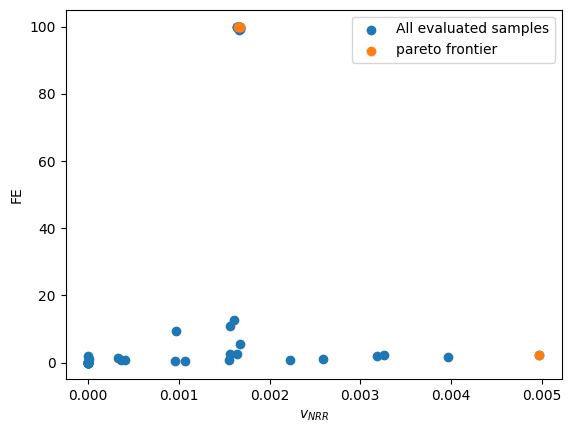

In [33]:
plt.scatter(np.exp(-1*Y[:, 0]), -100*Y[:, 1], label='All evaluated samples')
plt.scatter(np.exp(-1*Y_pf[:, 0]), -100*Y_pf[:, 1], label='pareto frontier')
plt.ylabel('FE')
plt.xlabel('$v_{NRR}$')
plt.legend()